In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from collections import Counter

from IPython.core.display import display, HTML

# Explore dataset

In [2]:
df = pd.read_csv("/content/bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
cats = ["job", "marital", "education", "default",
       "housing", "loan", "contact", "month", "poutcome", "y"]

nums = [i for i in df.columns if i not in cats]

# Categorical features tendencies

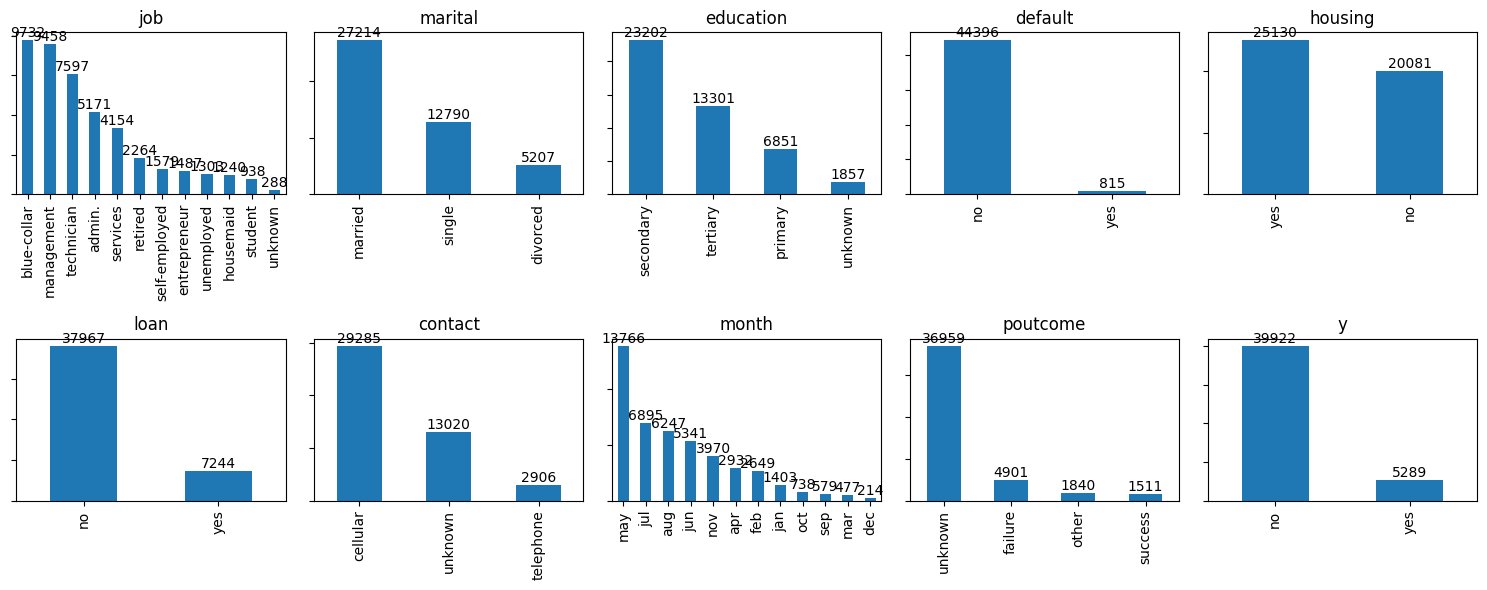

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

index = 0

for i in range(2):
    for j in range(5):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container)
        axes[i][j].set_yticklabels(())
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        axes[i][j].set_title(cats[index])
        index += 1

plt.tight_layout()
plt.show()

# Influence of categorical features on clients accepting/rejecting deposit subscription

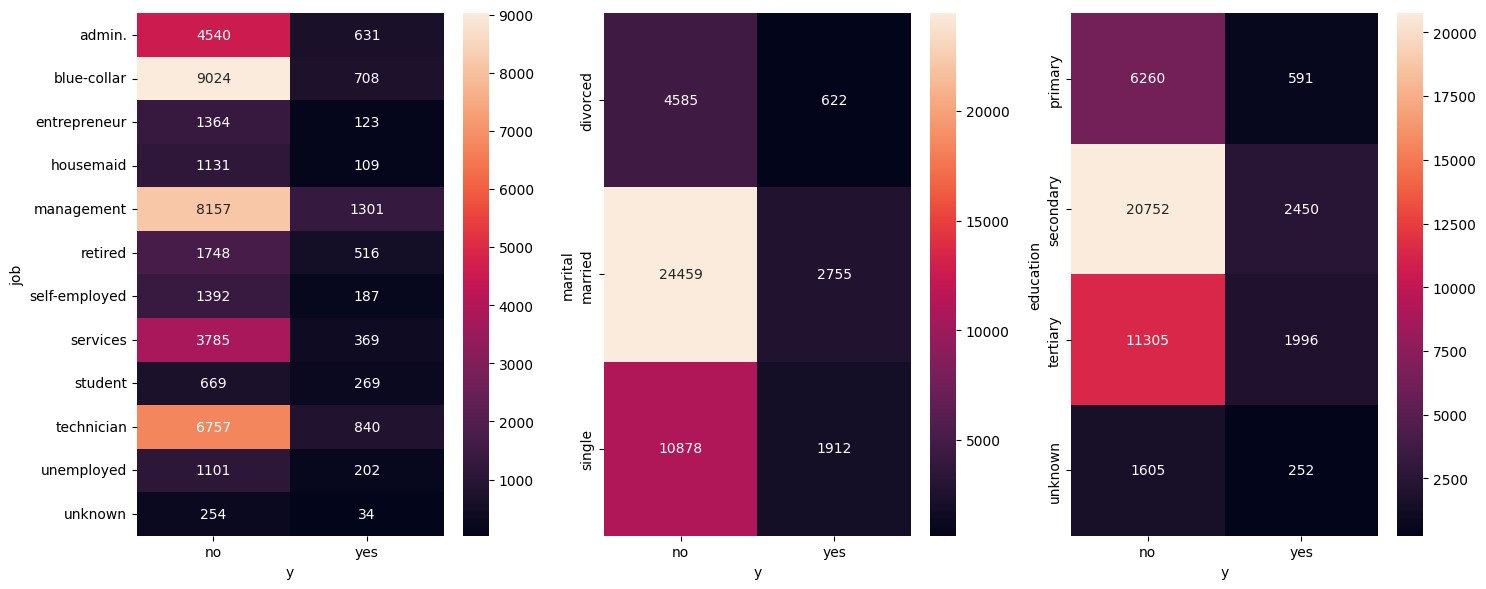

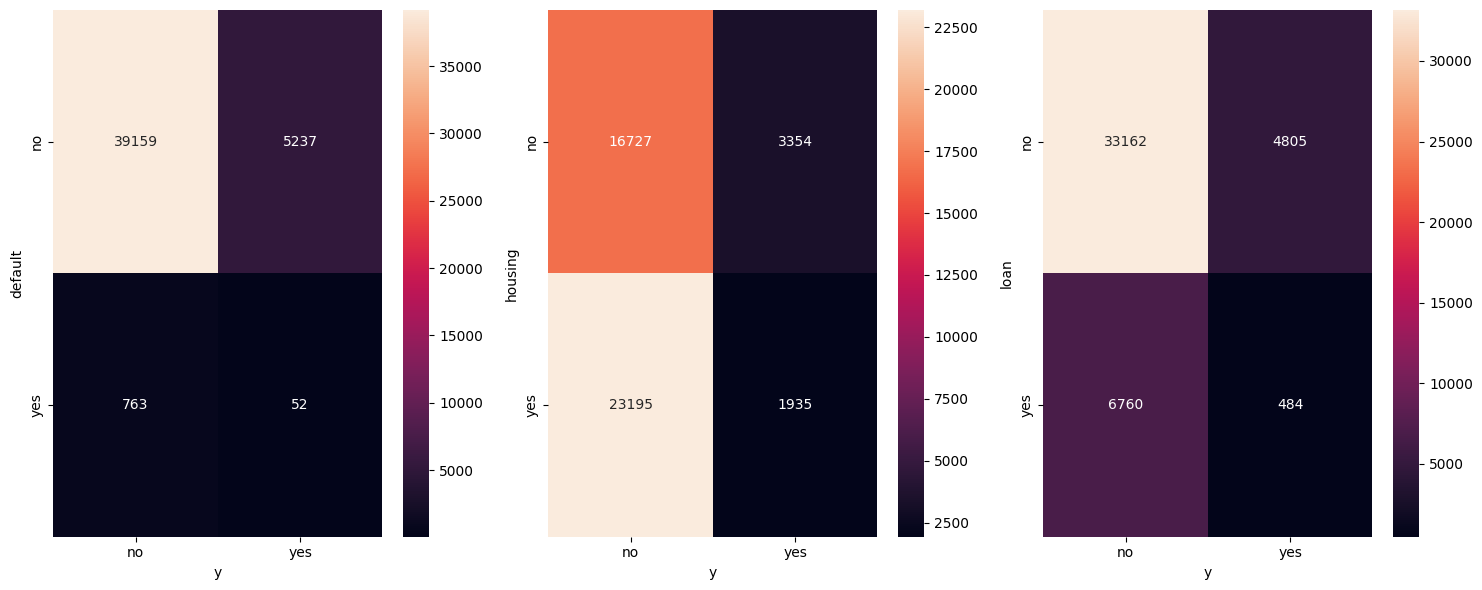

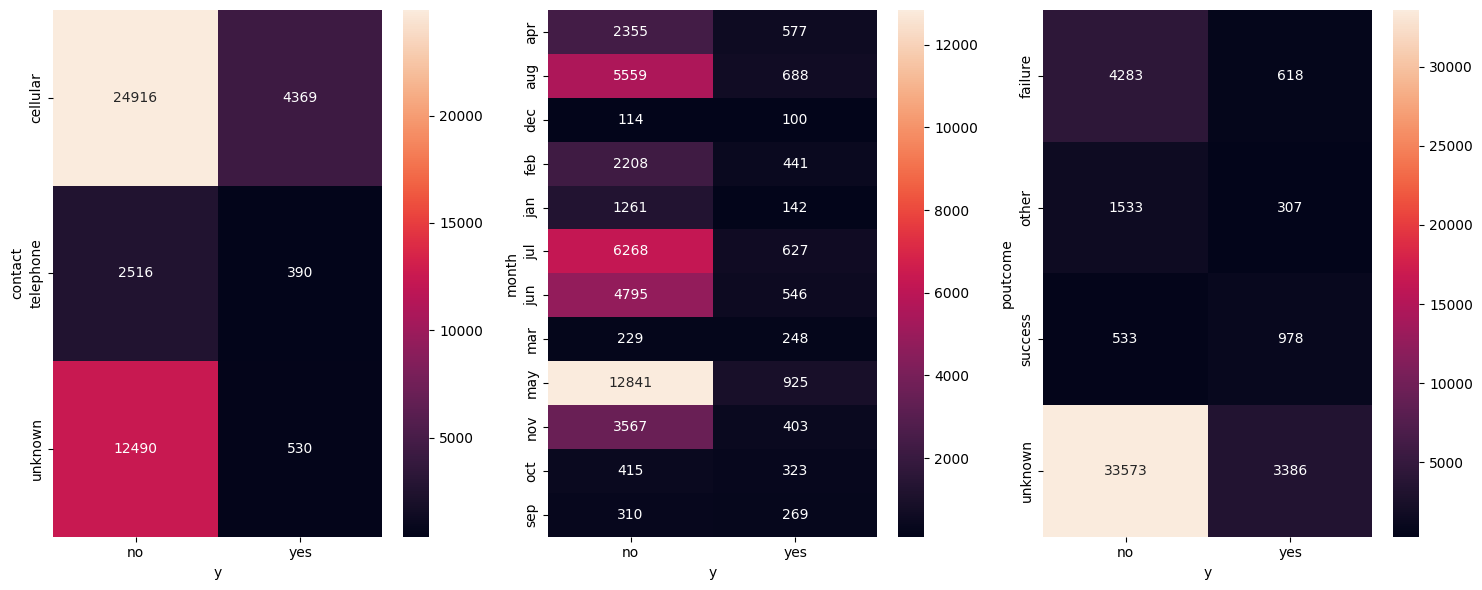

In [10]:
index = 0

for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    for j in range(3):
        sns.heatmap(pd.crosstab(df[cats[index]], df[cats[-1]]), annot=True, ax=axes[j], fmt='d')
        index += 1

    plt.tight_layout()
    plt.show()

# General data distribution with histograms, density plots and boxplots

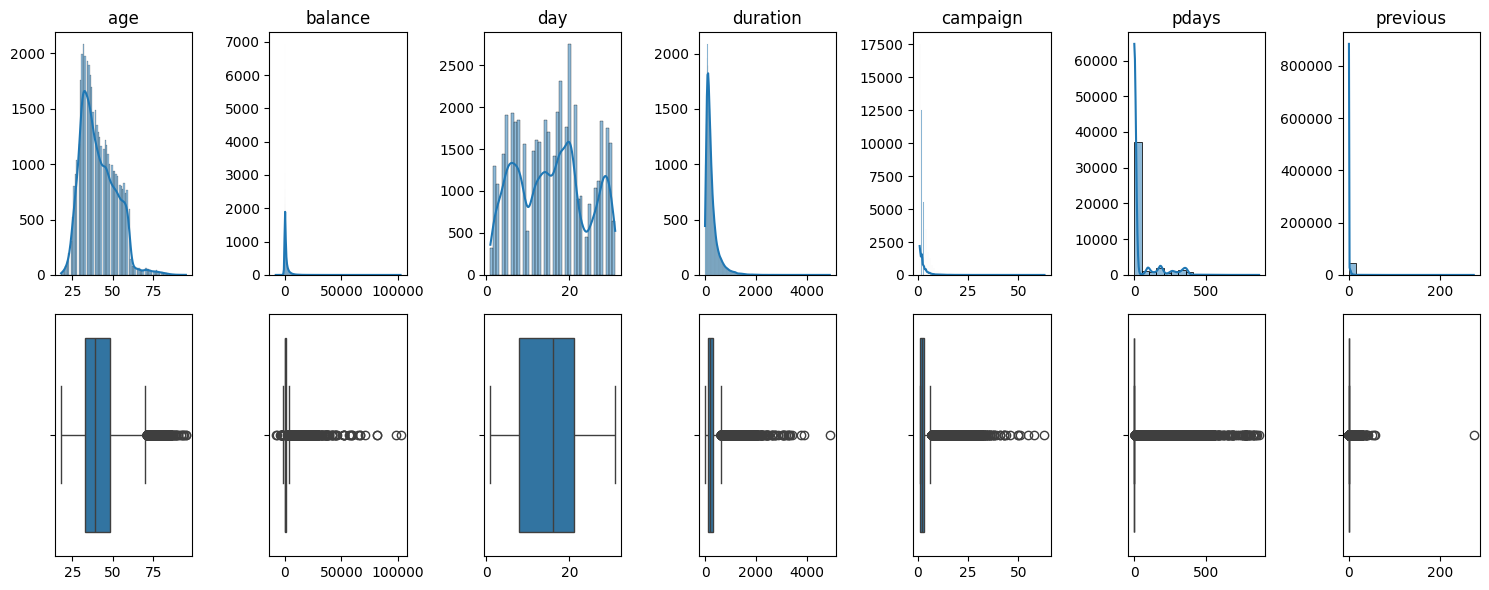

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 6))

for i, j in enumerate(nums):
    index = 0
    sns.histplot(df, x=j, kde=True, ax=axes[index][i])

    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)

    index += 1

    sns.boxplot(df, x=j, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")

plt.tight_layout()
plt.show()

# Data distribution: density plots, scatterplots and average values. Among clients that subscribed for term deposit and who didn't

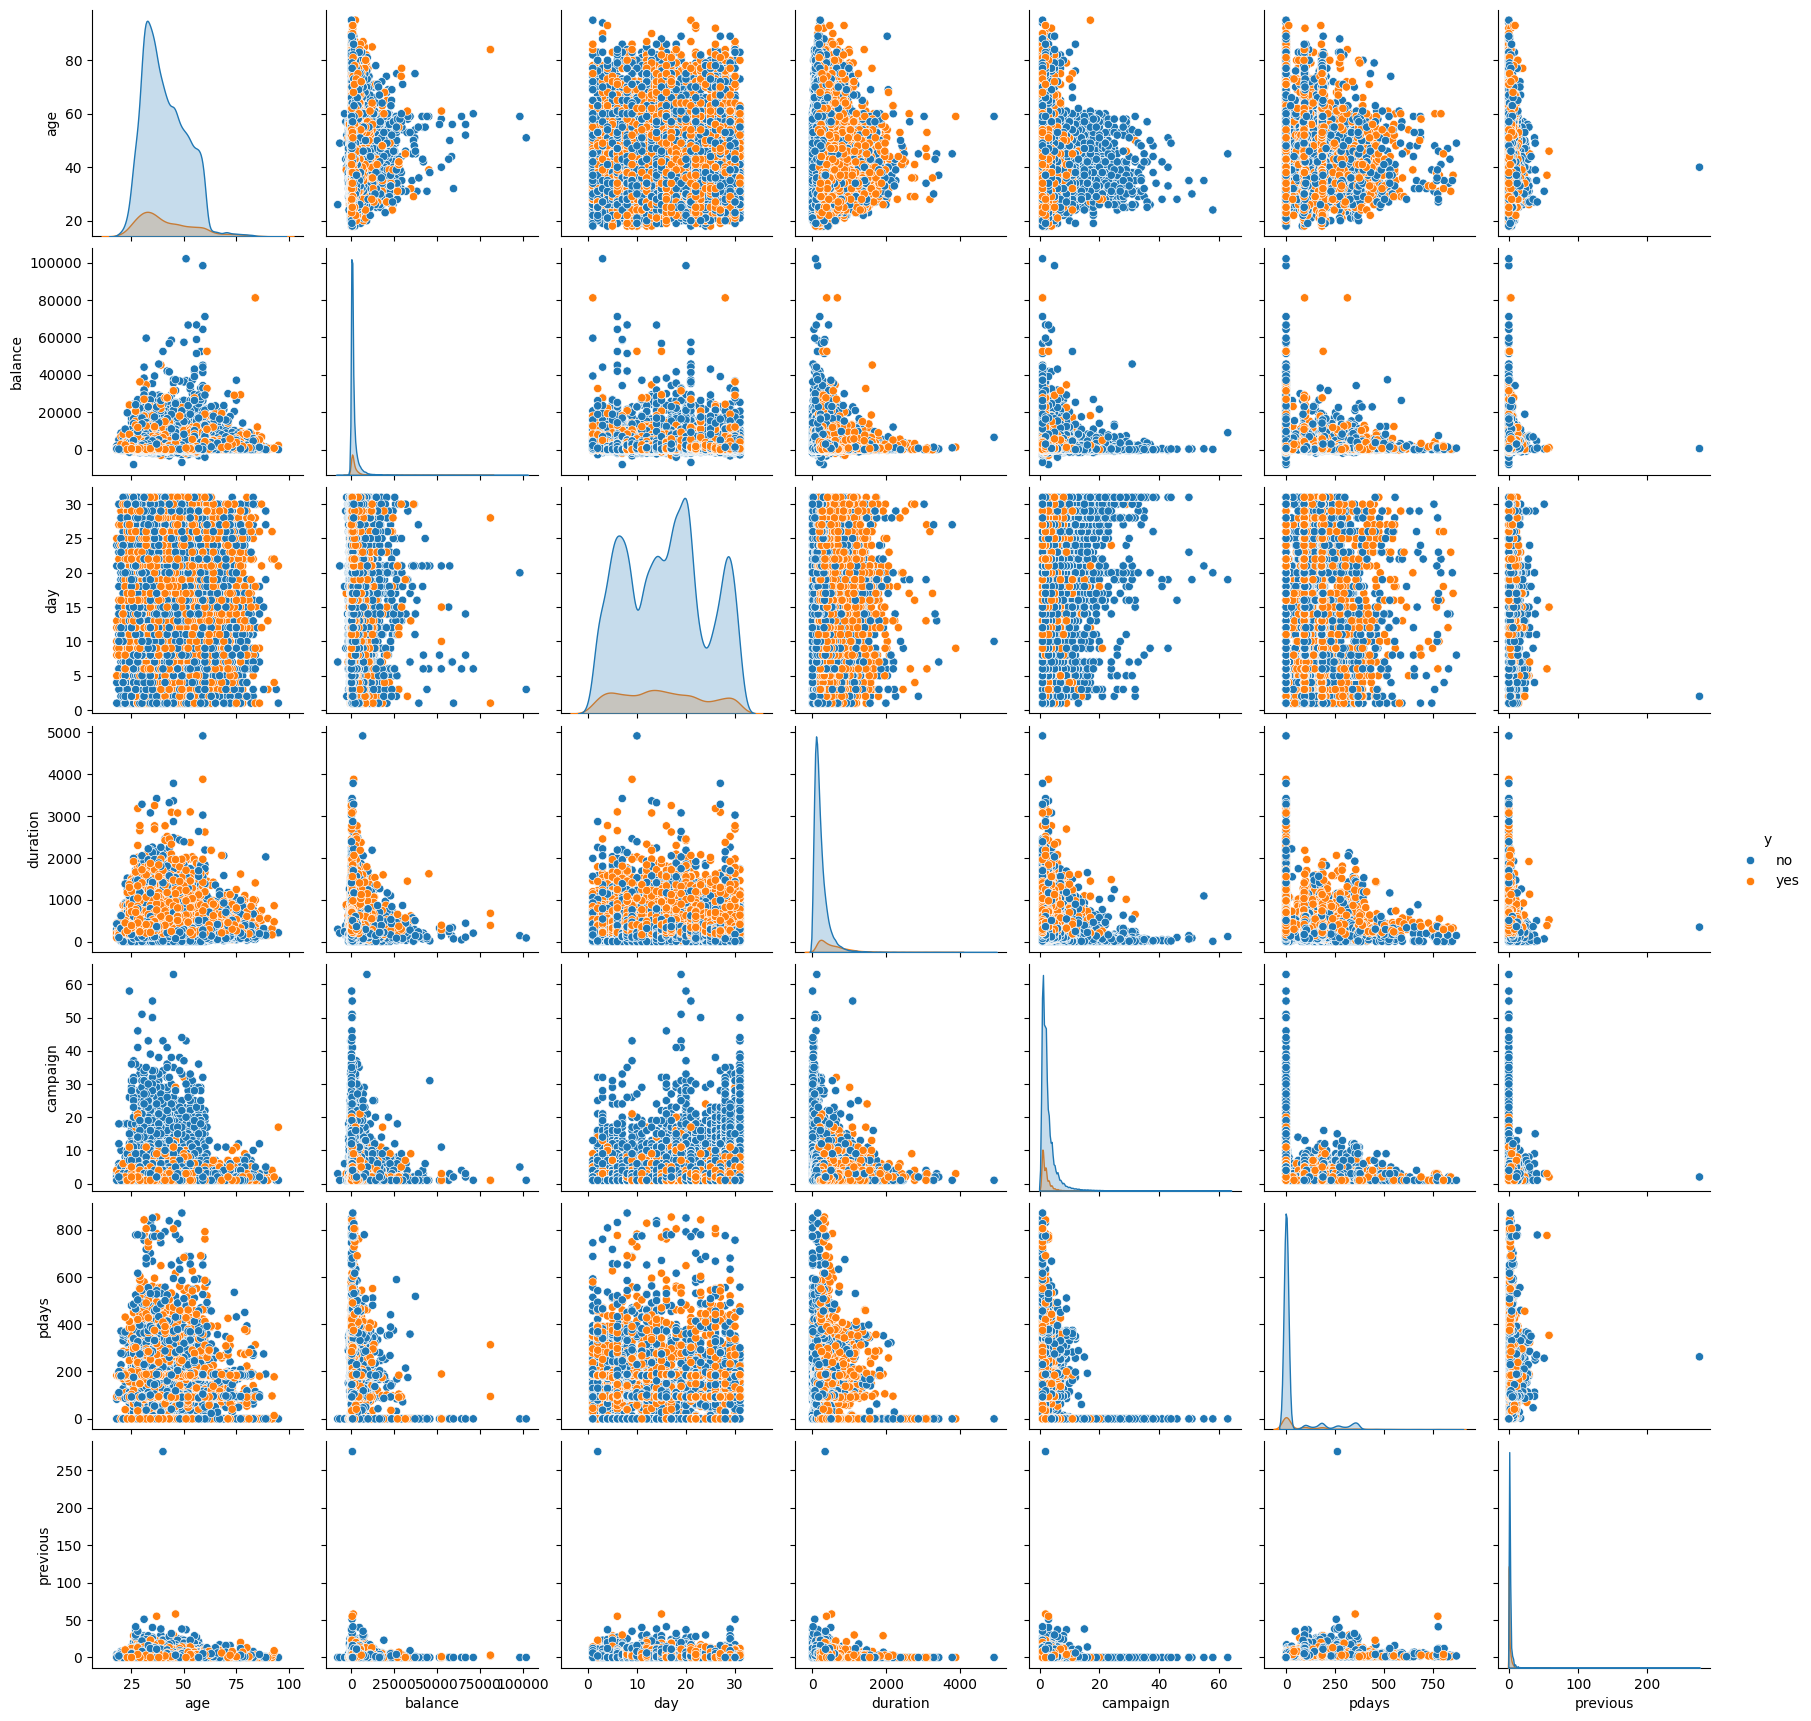

In [12]:
sns.pairplot(df, vars=nums, hue=cats[-1])
plt.show()

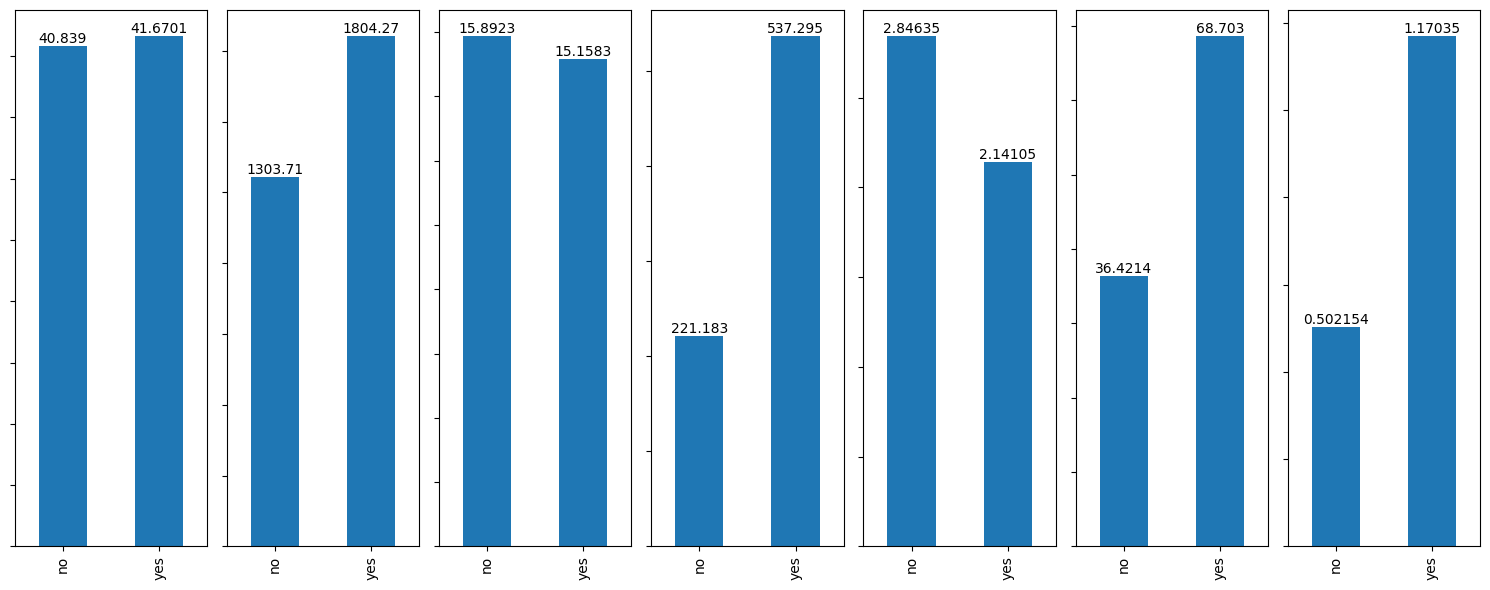

In [13]:
grouped = df.groupby(cats[-1])
fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

for i, j in enumerate(nums):
    mean = grouped[j].mean()
    mean.plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

# Data distribution and average values in numerical features among other categorical groups

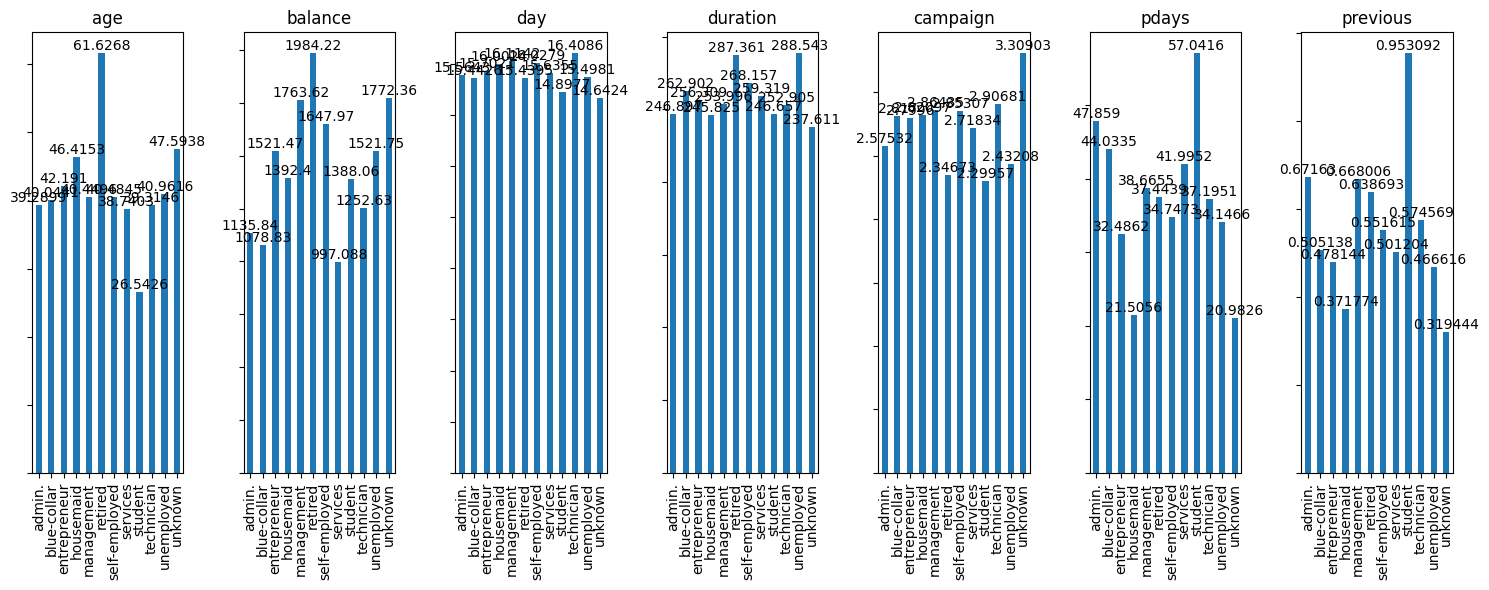

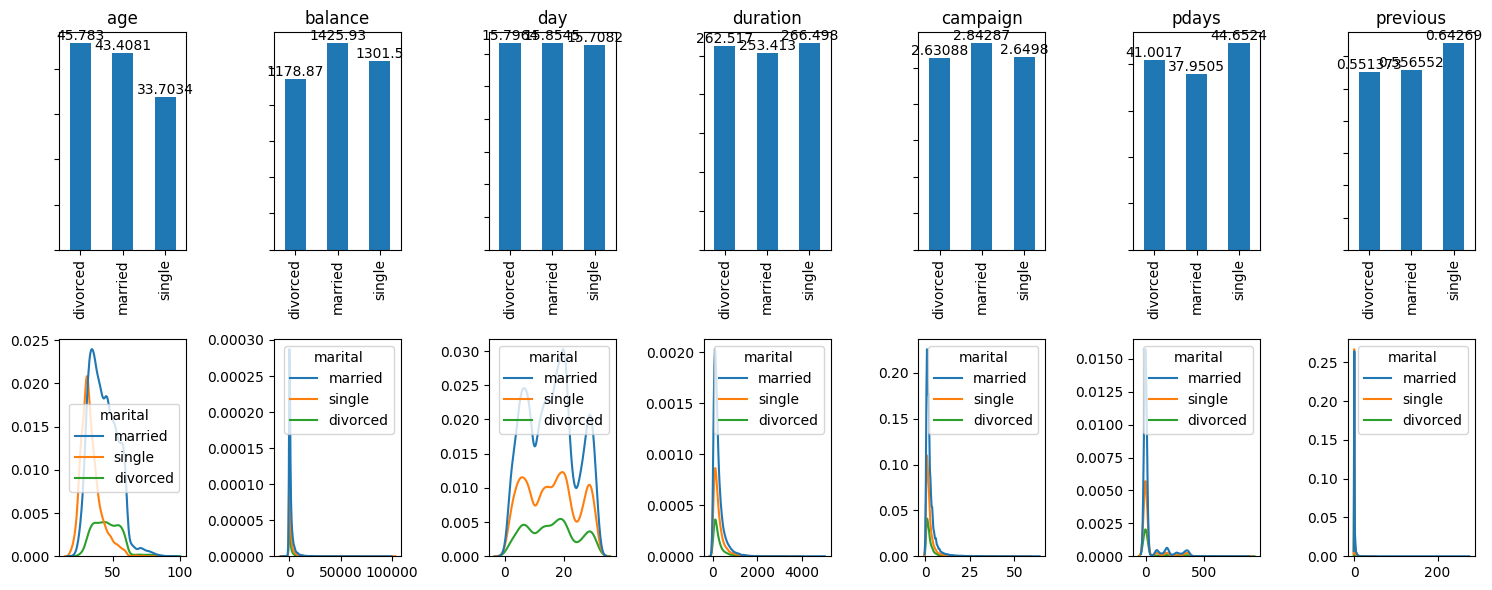

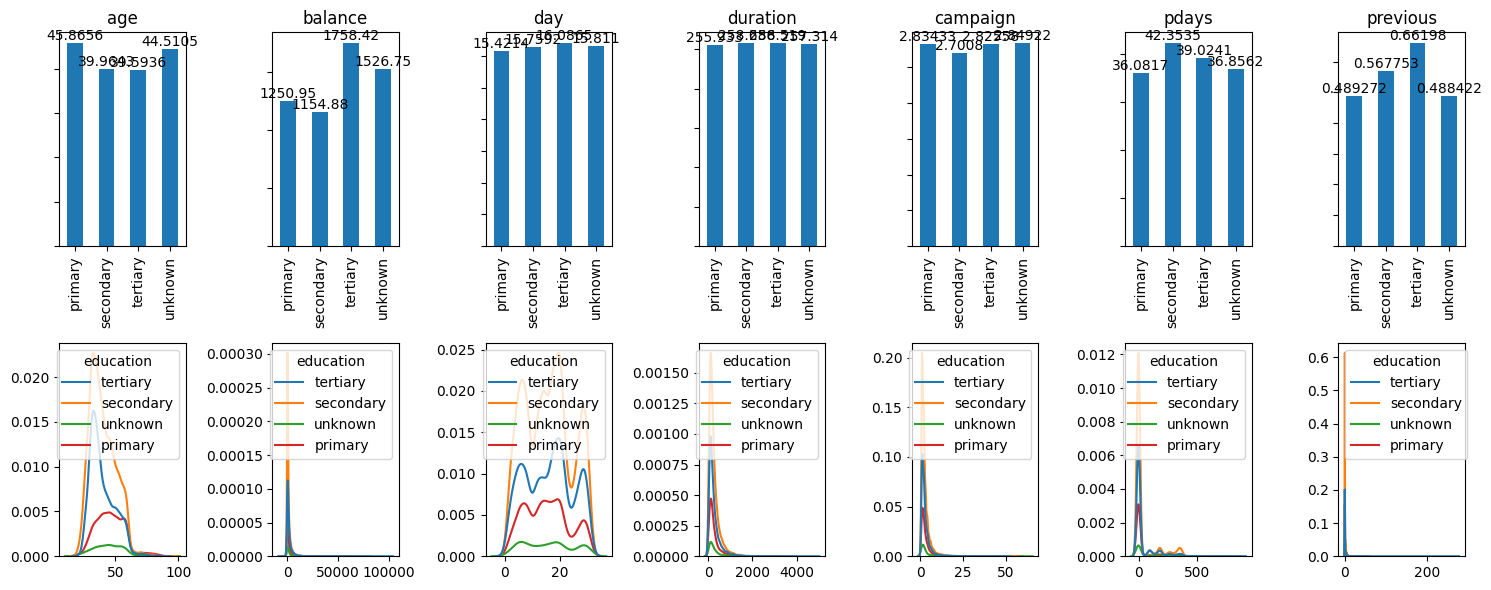

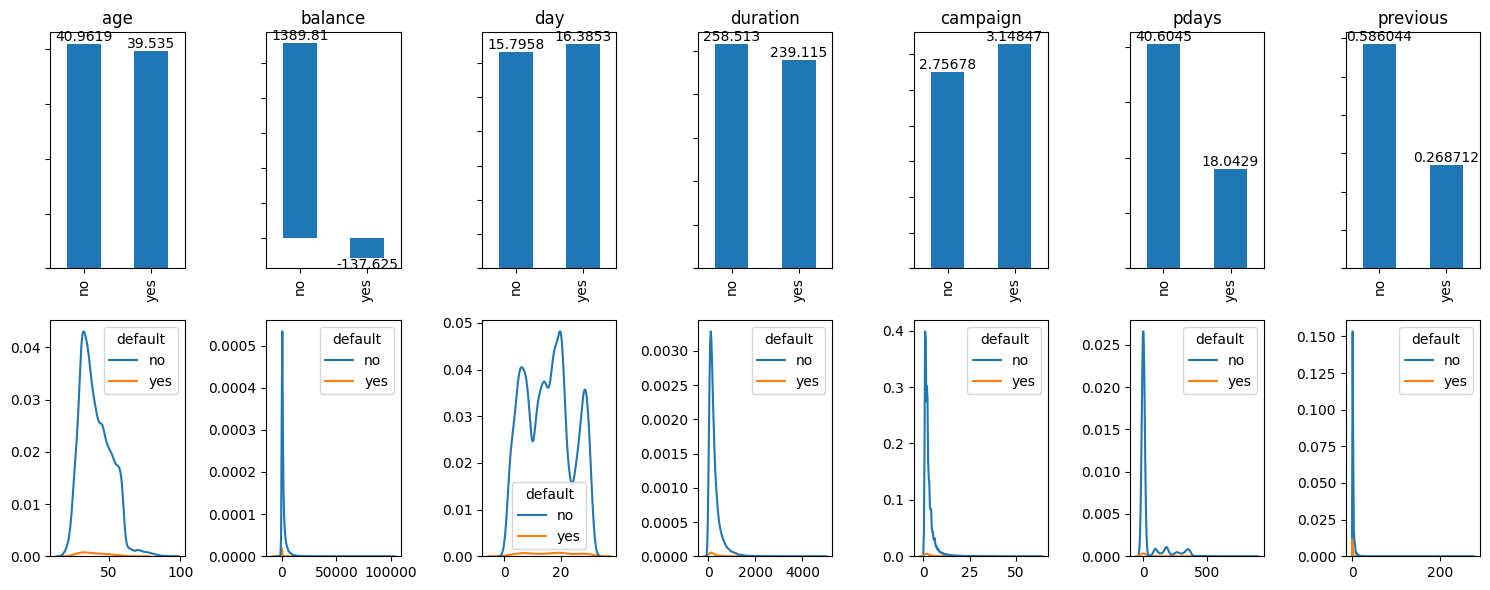

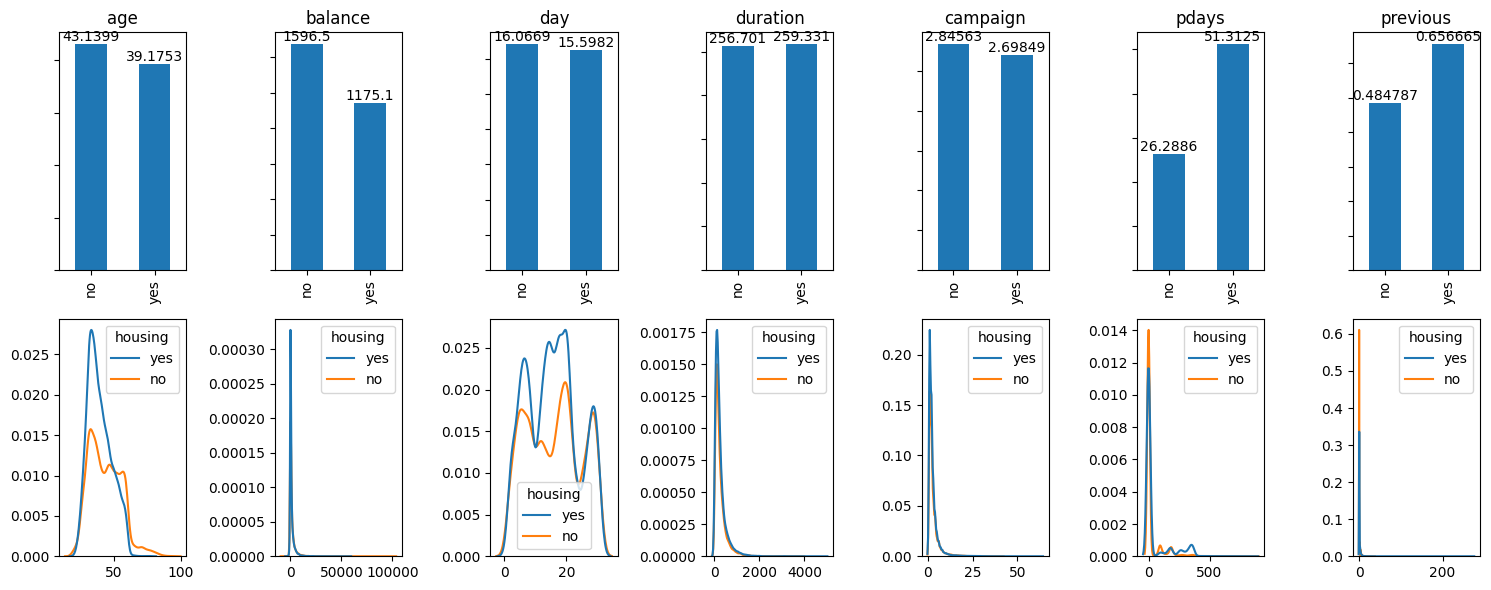

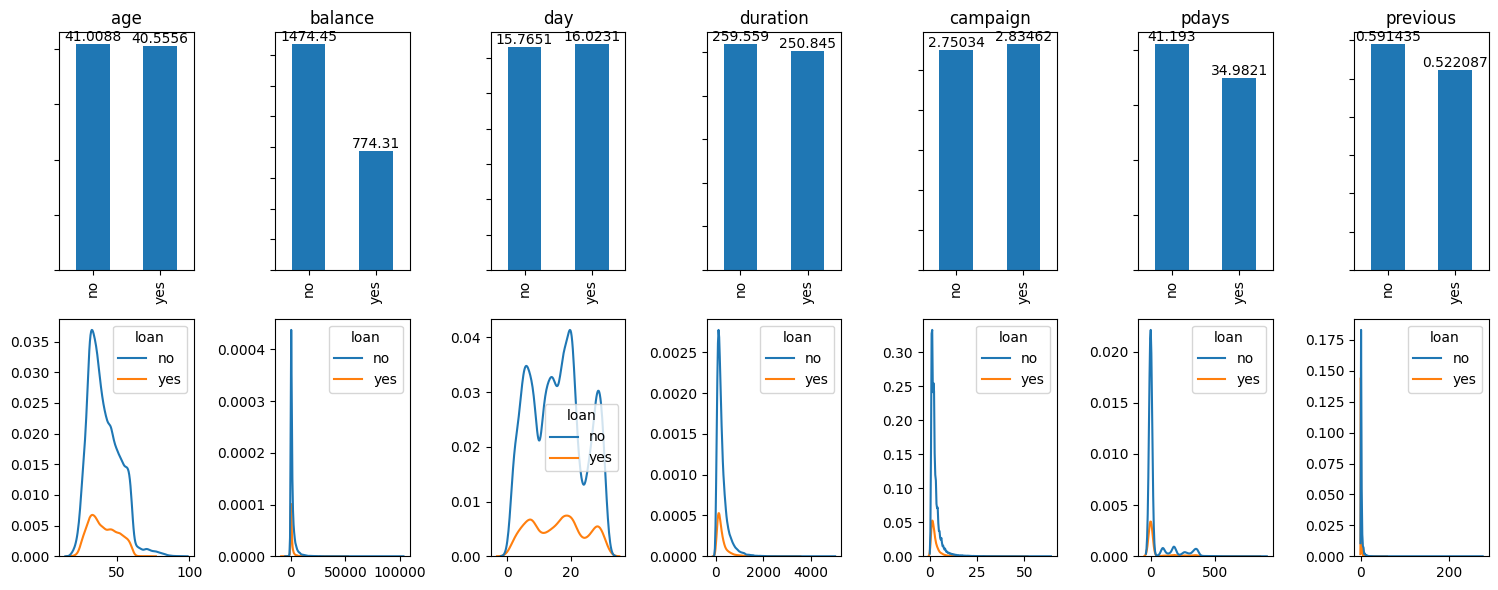

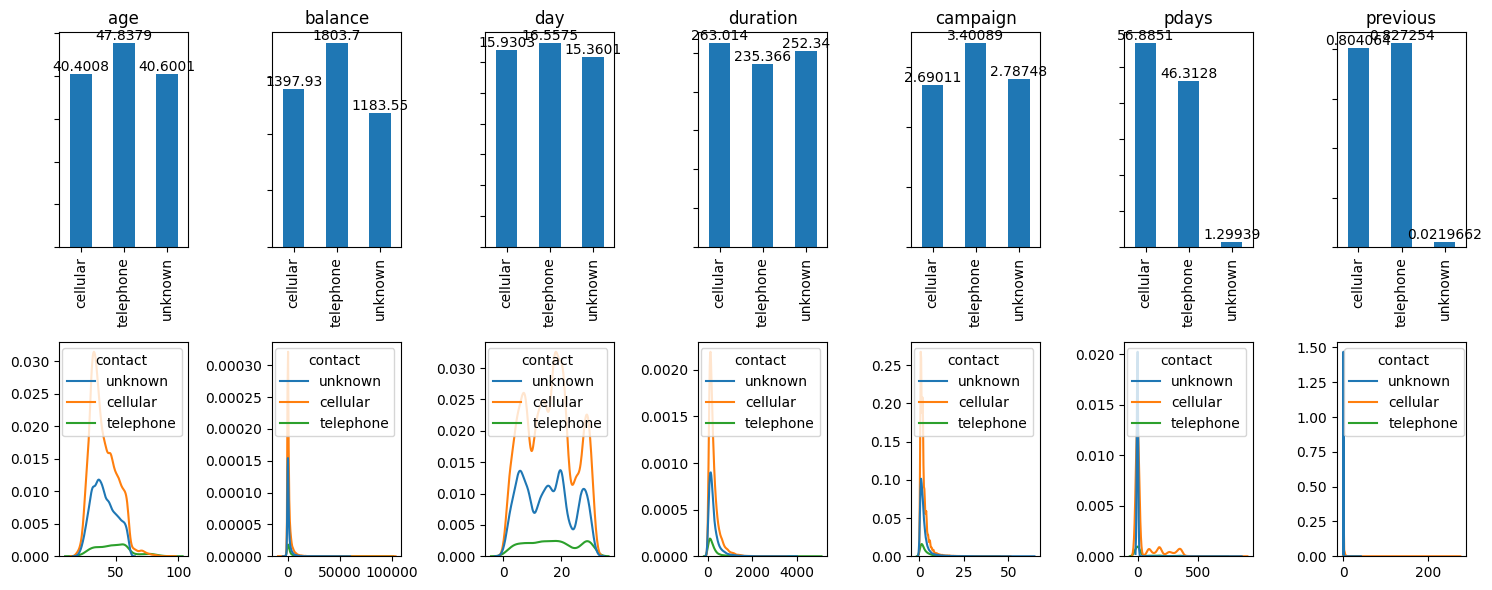

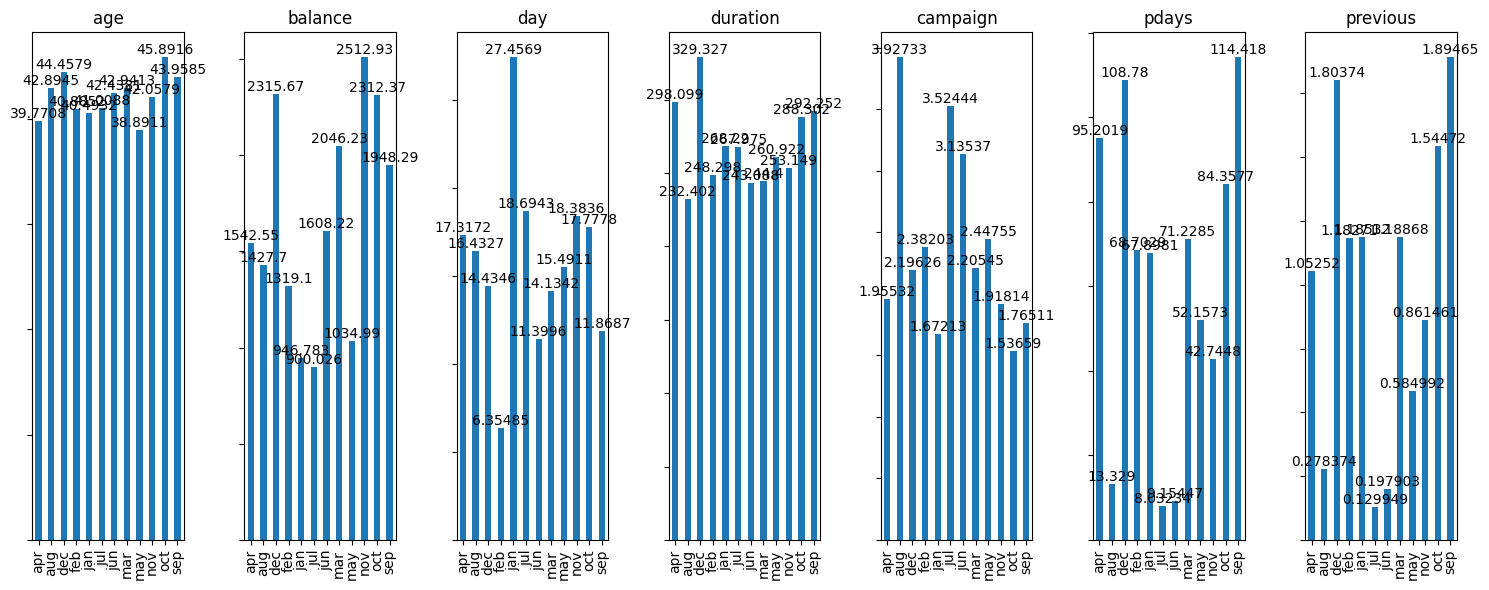

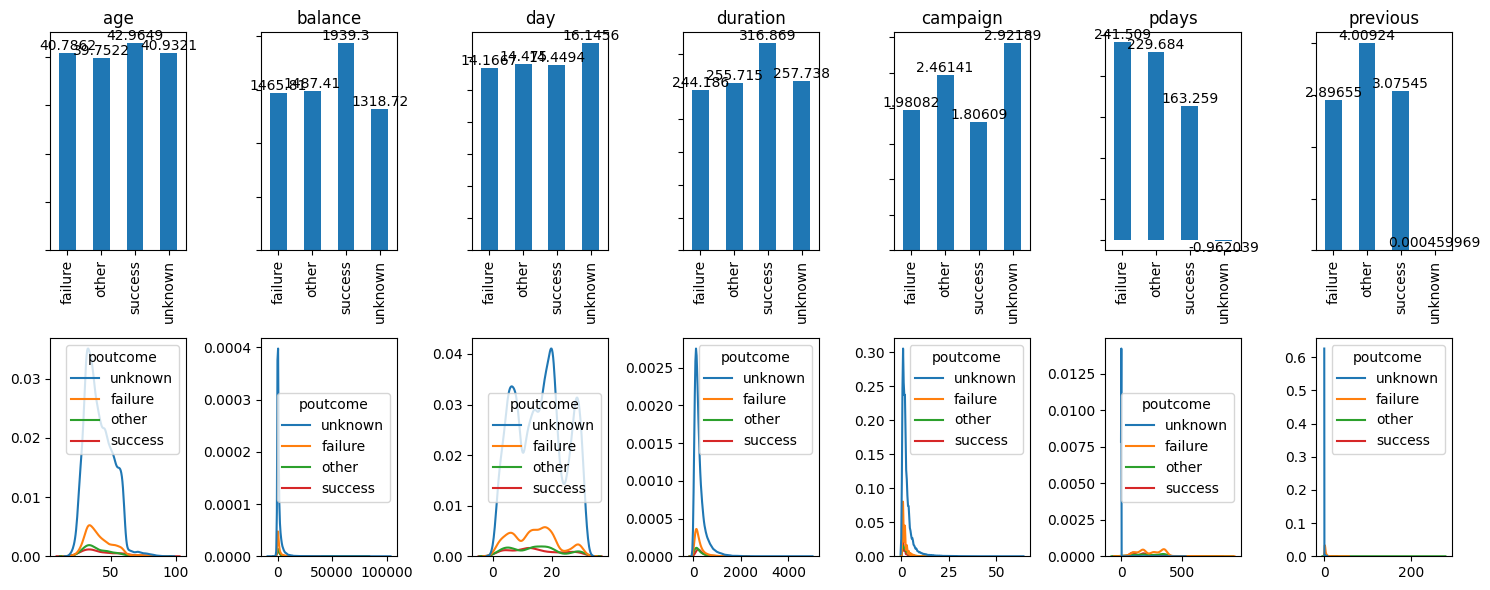

In [14]:
for i in cats[:-1]:

    display(HTML("<h2>{}</h2>".format(i)))
    uniques = df[i].nunique()
    if uniques <= 4:
        fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 6))
    else:
        fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

    grouped = df.groupby(i)
    for j, k in enumerate(nums):
        index = 0

        if uniques <= 4:
            mean = grouped[k].mean()
            mean.plot(kind="bar", ax=axes[index][j])
            for container in axes[index][j].containers:
                axes[index][j].bar_label(container)
            axes[index][j].set_yticklabels(())
            axes[index][j].set_ylabel("")
            axes[index][j].set_xlabel("")
            axes[index][j].set_title(k)

            index += 1

            sns.kdeplot(df,  x=k, hue=i, ax=axes[index][j])
            axes[index][j].set_ylabel("")
            axes[index][j].set_xlabel("")
        else:
            mean = grouped[k].mean()
            mean.plot(kind="bar", ax=axes[j])
            for container in axes[j].containers:
                axes[j].bar_label(container)
            axes[j].set_yticklabels(())
            axes[j].set_ylabel("")
            axes[j].set_xlabel("")
            axes[j].set_title(k)

    plt.tight_layout()
    plt.show()

# Categorical features encoding

In [15]:
le = LabelEncoder()

for i in cats:
    df[i] = le.fit_transform(df[i].values)

# Scaling features

In [16]:
scaler = MinMaxScaler()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x = scaler.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Handling class imbalances by applying SMOTE

In [18]:
print("Before ", Counter(y_train))

smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

print("After ", Counter(y_train))

Before  Counter({0: 31970, 1: 4198})
After  Counter({0: 31970, 1: 31970})


In [19]:
def training():
    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        score = accuracy_score(pred, y_test)
        report = classification_report(pred, y_test)
        cm = confusion_matrix(pred, y_test)
        scores += [score*100]
        reports[j] = report
        cms[j] = cm

    dd = pd.DataFrame({"score": scores}, index=names)
    fig, axes = plt.subplots()
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_yticklabels(())
    axes.set_ylabel("")
    axes.set_xlabel("")

    fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

    for i, j in enumerate(dd.index):
        sns.heatmap(cms[j], annot=True, ax=axes[i], fmt='d')
        axes[i].set_title("{}: {}%".format(j, dd.iloc[i, 0]))
    plt.tight_layout()
    plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

# Classification models

In [20]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
xgb = XGBClassifier()
lgb = LGBMClassifier()

models = [rfc, abc, gbc, etc,
         lgr, xgb, lgb]

names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "XGBoost", "LightGBM"]

[LightGBM] [Info] Number of positive: 31970, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3343
[LightGBM] [Info] Number of data points in the train set: 63940, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


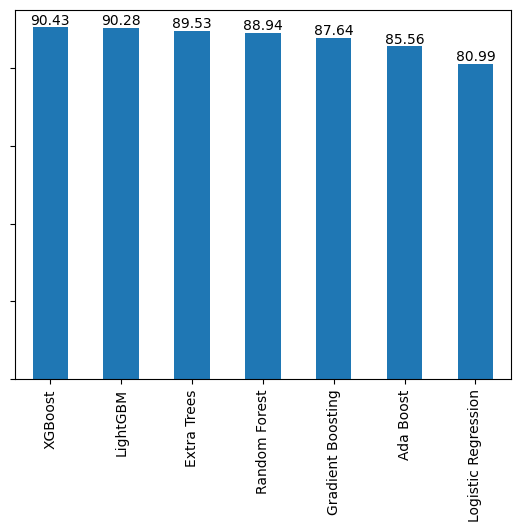

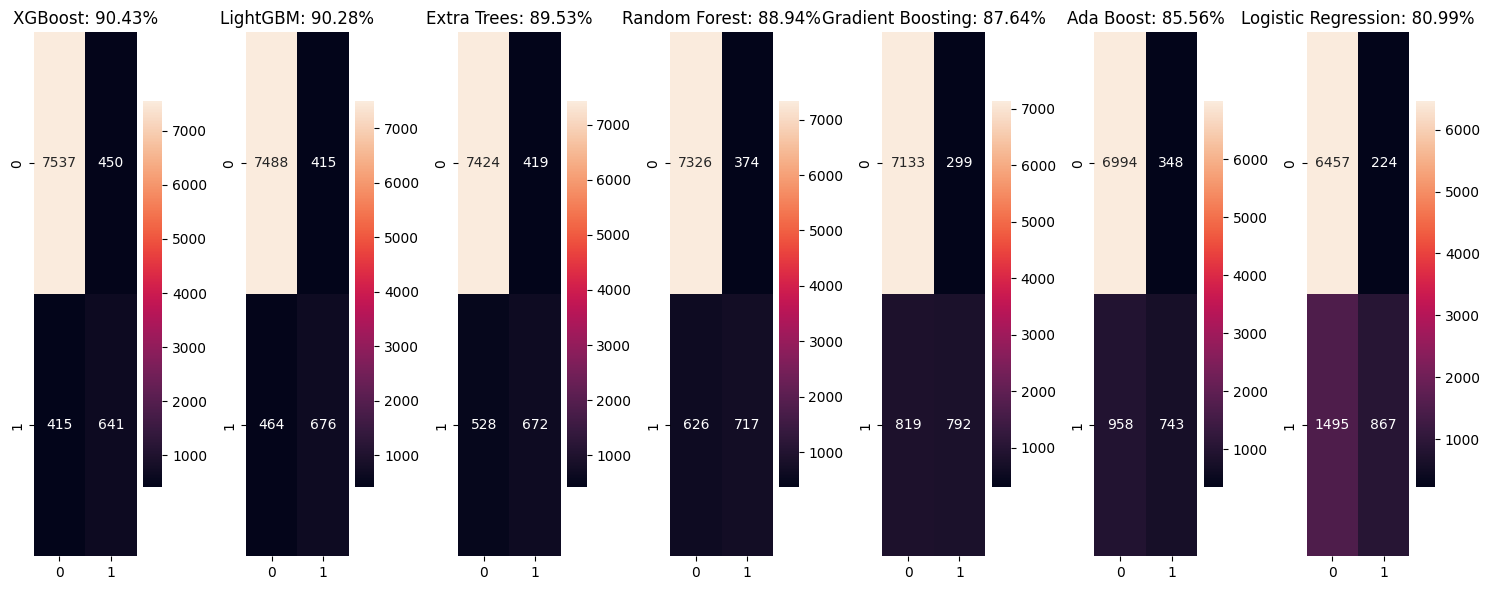

******************************
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7987
           1       0.59      0.61      0.60      1056

    accuracy                           0.90      9043
   macro avg       0.77      0.78      0.77      9043
weighted avg       0.91      0.90      0.91      9043




******************************
LightGBM
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7903
           1       0.62      0.59      0.61      1140

    accuracy                           0.90      9043
   macro avg       0.78      0.77      0.78      9043
weighted avg       0.90      0.90      0.90      9043




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7843
           1       0.62      0.56      0.59      1200

    accuracy                           0.90      9043


In [21]:
training()